# Algoritmo de cifrado por Sustitución ("Mono Alfabética")

En criptografía, el **cifrado** por **sustitución** es un método de cifrado por el que unidades de texto plano son sustituidas con texto cifrado siguiendo un sistema regular; las "unidades" pueden ser una sola letra (**Mono Alfabético**), pares de letras, tríos de letras (**Poli Alfabético**).

**Cifrado Atbash:** 
Establece las parejas de sustitución invirtiendo el orden del alfabeto del texto en claro. Por tanto en castellano la A será sustituida por la Z, la B por la Y,... Este tipo de cifrado se dice que es de alfabeto invertido.
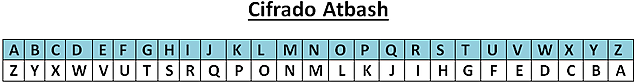

In [1]:
import string #librería para manejar caracteres y cadenas
import time #librería para manejar tiempo
from termcolor import colored #librería para manejar colores


# Generar la clave de sustitución inversa
def generar_clave():
    letras = string.ascii_lowercase #Devuelve una cadena que contiene todas las letras minúsculas del alfabeto inglés
    clave = {letras[i]: letras[-(i + 1)]for i in range(len(letras))} #Genera una clave de sustitución utilizando un diccionario
    return clave


def cifrar_mensaje(mensaje, clave):
    mensaje_cifrado = "" #Variable para almacenar el mensaje cifrado
     # Si la letra es mayúscula, la sustituye por mayúscula de la clave, de lo contrario, utiliza la minúscula
    for letra in mensaje:
        if letra.lower() in clave: 
            mensaje_cifrado += clave[letra.lower()].upper() if letra.isupper() else clave[letra]
        else:
            mensaje_cifrado += letra # Si la letra no está en la clave, la deja sin modificar
    return mensaje_cifrado


# Llama a la función cifrar_mensaje para descifrar el mensaje
def descifrar_mensaje(mensaje_cifrado, clave):
    return cifrar_mensaje(mensaje_cifrado, clave)


def calcular_tiempo_ejecucion(func):
    def wrapper(*args, **kwargs): # Obtiene el tiempo de inicio
        start_time = time.time() # medir el tiempo de ejecución de las funciones 
        resultado = func(*args, **kwargs) # Llama a la función proporcionada
        end_time = time.time() # Obtiene el tiempo de finalización
        tiempo_total = (end_time - start_time)*100 # Calcula el tiempo total de ejecución
        print(colored(f"Tiempo de ejecución: {tiempo_total} milisegundos", "green"))
        return resultado
    return wrapper



# Decorador para medir el tiempo de ejecución
@calcular_tiempo_ejecucion #función que toma otra función 
def cifrar_archivo(nombre_archivo, muestra=15): 
    with open(nombre_archivo, "r") as archivo: # Abre el archivo en modo lectura
        mensaje = archivo.read() # Lee el contenido del archivo

    clave = generar_clave() # Genera la clave de sustitución

    mensaje_cifrado = cifrar_mensaje(mensaje, clave) # Cifra el mensaje utilizando la clave
    
    # Guardar el mensaje cifrado en un nuevo archivo
    nombre_archivo_cifrado = f"{nombre_archivo.split('.')[0]}_cifrado.txt"
    with open(nombre_archivo_cifrado, "w") as archivo_cifrado:
        archivo_cifrado.write(mensaje_cifrado)

    print(colored("Mensaje cifrado:", "red", attrs=['bold']))
    imprimir_muestra(mensaje_cifrado, muestra)
    
    

@calcular_tiempo_ejecucion  
def descifrar_archivo(nombre_archivo_cifrado, clave, muestra=15):
    with open(nombre_archivo_cifrado, "r") as archivo_cifrado:
        mensaje_cifrado = archivo_cifrado.read()

    mensaje_descifrado = descifrar_mensaje(mensaje_cifrado, clave)
    
    # Guardar el mensaje descifrado en un nuevo archivo
    nombre_archivo_descifrado = f"{nombre_archivo_cifrado.split('_cifrado')[0]}_descifrado.txt"
    with open(nombre_archivo_descifrado, "w") as archivo_descifrado:
        archivo_descifrado.write(mensaje_descifrado)

    print(colored("Mensaje descifrado:", "red", attrs=['bold']))
    imprimir_muestra(mensaje_descifrado, muestra)
    
    

def imprimir_muestra(mensaje, muestra):
    palabras = mensaje.split()
    if len(palabras) <= muestra:
        print(mensaje)
    else:
        muestra_palabras = ' '.join(palabras[:muestra])
        print(muestra_palabras + '...')
        
def imprimir_clave(clave):
    letras_originales = ""
    letras_sustitutas = ""
    for letra, sustituta in clave.items():
        letras_originales += letra + " "
        letras_sustitutas += sustituta + " "
    print(colored("Clave de sustitución:", "red", attrs=["bold"]))
    print(letras_originales)
    print(letras_sustitutas)


In [2]:
# Ejemplo de uso
# Ruta y nombre del archivo a cifrar/descifrar
nombre_archivo = "C:/Users/luis1/OneDrive/Escritorio/Palabras/10.txt"

# 1. Generar la clave de sustitución
clave = generar_clave()

# 2. Imprimir la clave de sustitución
imprimir_clave(clave)

# 3. Cifrar e imprimir el texto cifrado.
print(colored("Cifrando el archivo...", "blue"))
cifrar_archivo(nombre_archivo, muestra=10)

nombre_archivo_cifrado = f"{nombre_archivo.split('.')[0]}_cifrado.txt"

# 4. Descifrar e imprimir el texto claro.
print(colored("\nDescifrando el archivo...", "blue"))
descifrar_archivo(nombre_archivo_cifrado, clave, muestra=10)

Clave de sustitución:
a b c d e f g h i j k l m n o p q r s t u v w x y z 
z y x w v u t s r q p o n m l k j i h g f e d c b a 
Cifrando el archivo...
Mensaje cifrado:
Kvil wvyl vckorxzigv xÃ³nl hv szyoz Ã±lÃ±l ZZZ ZZZZ ZZZ


Tiempo de ejecución: 0.1001119613647461 milisegundos

Descifrando el archivo...
Mensaje descifrado:
Pero debo explicarte cÃ³mo se habla Ã±oÃ±o AAA AAAA AAA


Tiempo de ejecución: 0.29976367950439453 milisegundos
